# NumPy arrays
Click [here](https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fberkeley-physics%2FPython-Tutorials&urlpath=tree%2FPython-Tutorials%2F2+-+Intermediate%2F3+-+NumPy+arrays.ipynb&branch=master) to open this notebook in the DataHub.

## Learning objectives
By the end of this tutorial, you will be able to:
- Distinguish between NumPy arrays and Python lists
- Construct arrays efficiently
- Do linear algebra with NumPy arrays
- Index, reshape, and broadcast NumPy arrays
- Manipulate and perform computations with multi-dimensional NumPy arrays
- Make plots of scalar, two-dimensional data

## Relevant documentation
- [IPython magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)
- [NumPy array construction guide](https://numpy.org/doc/stable/user/basics.creation.html)
- [NumPy indexing guide](https://numpy.org/doc/stable/user/basics.indexing.html)
- [NumPy `linalg` module](https://numpy.org/doc/stable/reference/routines.linalg.html)
- [NumPy broadcasting guide](https://numpy.org/doc/stable/user/basics.broadcasting.html)
- [`mplot3d` tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [matplotlib colormap guide](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

## Lists vs arrays
Python lists are dynamic and flexible. You can change the legth of a list by adding or removing entries, and you can add entries of any type. NumPy arrays, on the other hand, are more rigid: their length is immutable and all the entries must have the same type, given by the data type of the array. 

Computations with NumPy arrays are faster than those with lists, because they can take advantage of these additional constraints to implement these computations more efficiently. Suppose we wanted to create a list-like object that contains $n^3$ for $n$ upto some large $N$. The following cells do that in various ways. Run them and see which is the fastest. (The `%%timeit` command is an _IPython magic_ that times the execution of a cell several times and prints the statistics. The `%timeit` magic times the execution of a single line. Use the similar `time` magic to time the execution only once.)

In [3]:
import numpy as np

N = 10000

In [2]:
%%timeit

python_list = []
for n in range(N):
    python_list.append(n**3)

3.22 ms ± 33.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
%timeit list_comp = [n**3 for n in range(N)] #list comprehensions are slightly faster

2.64 ms ± 18.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%timeit numpy_array = np.arange(N)**3

31.2 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


NumPy arrays are convenient because they can be treated like numbers, and arithmetic operations between arrays of the same size are equivalent to the same arithemtic being done element-wise between the two arrays.

In [5]:
a = [1,2,3]
b = [4,5,6]

a_arr = np.array(a)
b_arr = np.array(b)

print(a_arr + b_arr)
print(a+b)

[5 7 9]
[1, 2, 3, 4, 5, 6]


In [6]:
print(a_arr*2)
print(a*2)

[2 4 6]
[1, 2, 3, 1, 2, 3]


In [7]:
print(a_arr>2)
print(a>2)

[False False  True]


TypeError: '>' not supported between instances of 'list' and 'int'

This allows us to write functions that work for both individual numbers as well as arrays. Write your own (numerical) function below, and compare its execution on a list to that on an array.

In [8]:
def f(x):
    return x**2 #change me

%timeit [f(x) for x in range(N)]
%timeit f(np.arange(N))

3.25 ms ± 72.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.7 µs ± 236 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Doing computation on NumPy arrays directly instead of looping through elements (vectorisation) is much faster because the for loop is executed in a low-level language that allows the code execution to be micromanaged and optimised, unlike Python, which is a high-level language built for convenience. The most efficient code in Python transfers as much computation as possible to lower-level languages.

## Array constructors
You can create NumPy arrays by converting Python lists (that are all of the same type), or reading suitably stored data from a file. You should have already seen some examples of this. In this section we will go over how to construct arrays within NumPy.

The `zeros` and `ones` functions construct arrays of a given length and datatype (defaulting to floats).

In [ ]:
np.zeros(5)

In [ ]:
np.zeros(10, dtype=int)

In [ ]:
np.ones(3)

In [ ]:
np.ones(6, dtype=bool)

The `linspace(start, end, number)` function is especially useful to create arrays sampling values, e.g. for plotting. For example, here is a plot of $x$ vs. $x^2$.

Text(0, 0.5, '$x^2$')

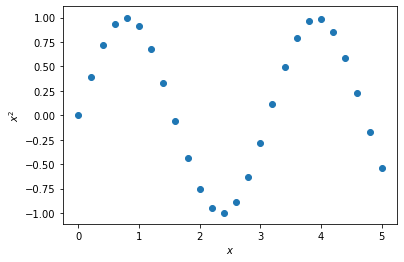

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt

x = np.linspace(0,5,26) #26 samples from 0 to 5
y = np.sin(2*x)

plt.scatter(x, y)
plt.xlabel("$x$")
plt.ylabel("$x^2$")

The `logspace` constructor similarly creates an array evenly spaced in log-space, which is useful for log-scaled plots. To tell `matplotlib` to use log-scaling on the axes, you can use `plt.loglog()` instead of `plt.plot()` or use the object-oriented approach to adjust the scale for each axis (for more information see the tutorial on objects).

## Indexing arrays
Numpy arrays can be indexed by the default python syntax. The following works for both python lists and numpy arrays: 
- `array[index]` returns the element at position `index` (starting from 0). You can also index backwards, using `-1` to mean the last element, onward.
- `array[start:end:step]` returns a new array containing the specified elements of the original array (starting at index `start`, and moving `step` indices for each element, upto but not including index `end`). If no values are passed between colons, the reasonable defaults are assumed.

In [31]:
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
       2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ])

In [35]:
x[2] #third element

0.4

In [36]:
x[-2] #second-to-last element

4.800000000000001

In [ ]:
x[2:4] #third, fourth element

In [37]:
x[:3] #up to third element

array([0.2, 0.4])

In [ ]:
x[-4:] #last four elements

In [ ]:
x[:] #all elements (useful for copying an array or for assigning it a constant value)

In [34]:
x[::-1] #reverse the array

array([5. , 4.8, 4.6, 4.4, 4.2, 4. , 3.8, 3.6, 3.4, 3.2, 3. , 2.8, 2.6,
       2.4, 2.2, 2. , 1.8, 1.6, 1.4, 1.2, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

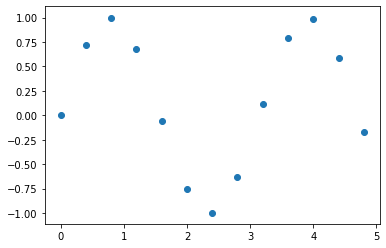

In [61]:
plt.scatter(x[::2],y[::2]) #use only every second element

From the array `x`, try to obtain the following arrays by splicing:
- the integers 0-5
- the numbers greater than or equal to 2
- the integers 4-2 (in reverse order)
- the numbers ending with .4

In [ ]:
#try your hand at splicing!

Numpy arrays generalise these further. Here we'll show you two ways to index arrays that won't work with lists.

One is to pass for the index an array-like object of Booleans of the same shape as the array, which will keep the elements whose corresponding Boolean is `True`.

In [92]:
a = np.array([1,2,3,4,5])
a[[True, False, False, True, True]]

array([1, 4, 5])

Suppose we only cared about non-negative `y` values. Use the following Boolean array `b` to create sub-arrays of `x` and `y` corresponding to those pairs where $y\geq0$, and make a scatter-plot.

In [96]:
b = y >= 0
print(b)

[ True  True  True  True  True  True  True  True False False False False
 False False False False  True  True  True  True  True  True  True  True
 False False]


In [ ]:
x_nonneg = #fill me in
y_nonneg = #fill me in

plt.scatter(x_nonneg, y_nonneg)

Another convenient way to splice numpy arrays (but not lists) is to index it with an array (or array-like object) of indices, to obtain an array of elements corresponding to the indices. This is perhaps easier to show than explain:

In [43]:
a = x[[0,1,2,1,-1]]
a

array([0. , 0.2, 0.4, 0.2, 5. ])

One example of how this could be used is as follows: suppose instead of `x` and `y` we were given the arrays `x_shuff` and `y_shuff`, which are `x` and `y` but out of order. 

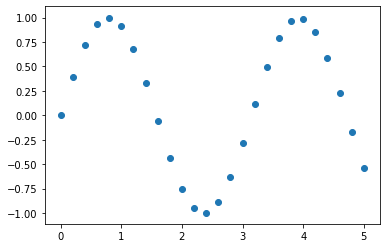

In [87]:
x_shuff = np.array(
    [1.4, 2.0, 0.0, 4.0, 5.0, 3.4, 1.0, 4.2, 0.2, 1.6, 3.6, 1.8, 0.8, 3.0, 0.6, 2.8, 3.2, 4.4, 2.4, 2.2, 
     2.6, 3.8, 4.8, 1.2, 0.4, 4.6]
)
y_shuff = np.array(
    [0.33498815015590466, -0.7568024953079282, 0.0, 0.9893582466233818, -0.5440211108893698, 
     0.49411335113860894, 0.9092974268256817, 0.8545989080882804, 0.3894183423086505, -0.058374143427580086, 
     0.7936678638491531, -0.44252044329485246, 0.9995736030415051, -0.27941549819892586, 0.9320390859672264, 
     -0.6312666378723208, 0.11654920485049364, 0.5849171928917617, -0.9961646088358406, -0.951602073889516, 
     -0.8834546557201531, 0.9679196720314865, -0.1743267812229814, 0.6754631805511506, 0.7173560908995228, 
     0.22288991410024592]
)

plt.scatter(x_shuff, y_shuff)

While it displays fine in a scatter-plot, consider what happens if we try to connect the dots out-of-order:

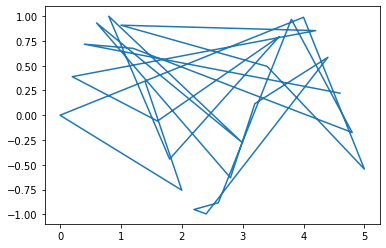

In [88]:
plt.plot(x_shuff,y_shuff)
#plt.plot(x,y) #compare with this (though in this game this is cheating since we don't know what x and y are)

Thus we'd like to put `x_shuff` and `y_shuff` in increasing order of `x`. The numpy function `sort` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.sort.html#numpy.sort)) does this for us, as shown below. Does this give us the correct plot? Why or why not?

In [89]:
x_sort = np.sort(x_shuff)
print(x_sort)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]


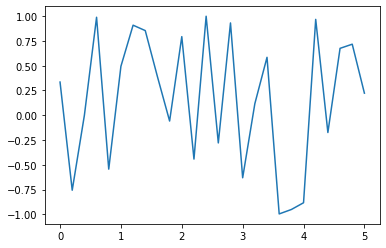

In [90]:
plt.plot(x_sort, y_shuff)

The above approach did not work because the `y` array was still shuffled, and we are using mismatched $x,y$ pairs. To do this, we can use the numpy function `argsort` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html#numpy.argsort)) that returns the _indices_ of the `x_shuff` elements in increasing order, stored as an array `indices`. Use it to find the sorted arrays `x_sort` and `y_sort` and plot them. 

(Hint: remember, we're learning how to index arrays using arrays of integers corresponding to indices.)

In [91]:
indices = np.argsort(x_shuff)
print(indices)

[ 2  8 24 14 12  6 23  0  9 11  1 19 18 20 15 13 16  5 10 21  3  7 17 25
 22  4]


In [ ]:
x_sort = #fill me in
y_sort = #fill me in

plt.plot(x_sort,y_sort)

## Linear algebra
It is useful to think of NumPy arrays as vectors. In this section we will do some linear algebra using NumPy arrays as vectors. Let's start with 2d vectors, which are easy to plot. The following cell defines a few random vectors pointing from the origin to the $[0,1]\times[0,1]$ square, and plots them. (Read the random sampling tutorial for more about generating pseudo-random numbers.)

In [80]:
vectors = [] #vectorise me (replace with a numpy array)
N = 5
for i in range(N):
    vectors.append(np.random.uniform(size=2))

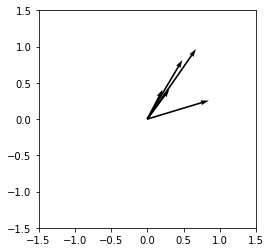

In [81]:
for vec in vectors:
    plt.quiver(0, 0, vec[0], vec[1], scale=1, scale_units="xy", angles="xy")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.gca().set_aspect("equal")

As we discussed earlier, we should avoid using lists where we can easily replace it with NumPy arrays. The above is one example: we can replace the list of numpy arrays `vectors` with a single 2-dimensional numpy array. Like a 1d (flat) numpy array is a vector, a 2d numpy array is a matrix, and higher dimensional arrays are like tensors. A multi-dimensional numpy array is simply a 1d array with a shape, in that the elements are ultimately stored sequentially in memory. The shape tells numpy how to access certain elements, so we can pretend to have higher-dimensional data structures. Think of how a $M\times N$ matrix might carry the same information as a $MN$-dimensional vector. 

Every numpy array has a `shape` attribute, which is the tuple containing the number of elements in each _axis,_ e.g. $(M,N)$. The length of this tuple is the "rank" of the "tensor", which is stored in the `ndim` attribute. Since ultimately each array is stored flat, this only changes the way we address the elements. This means changing the shape of an array is quick and easy, using the `reshape` method ([docs](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html)), passing in a tuple whose product is the same as the current shape (where do you think this requirement comes from?). If you pass in `-1` as the size of (at most) one axis, it will deduce the size automatically. You can use the `flatten` method ([docs](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)) to make any array one-dimensional.

In [82]:
a = np.arange(24) #try reshaping this "vector"
print(a)
a.shape

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


(24,)

In [83]:
b = a.reshape((3,-1)) #a 3x8 "matrix"
print(b)
b.shape

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]]


(3, 8)

In [84]:
c = a.reshape((3,2,4)) #a 3x2x4 "rank-3 tensor"
print(c)
c.ndim 
#try making a higher-dimensional array (challenge: reshape a into an array with ndim == 10)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]]


3

In [85]:
print(c.flatten()) #"back" to a "vector"

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [86]:
a.reshape((5,-1))

ValueError: cannot reshape array of size 24 into shape (5,newaxis)

In the case above, we would set `vectors` to a 2d numpy array with shape `(N,2)` (or `(2,N)`). Try doing it yourself, by changing the size of the array of random numbers we get from the RNG, and reshaping it. 

The _vectorised_ code is below. Note how we seem to have gotten rid of the loops.

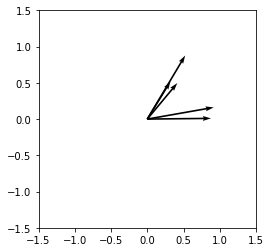

In [87]:
vectors = np.random.uniform(size=2*N).reshape((2,-1))

plt.quiver(0, 0, vectors[0], vectors[1], scale=1, scale_units="xy", angles="xy")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.gca().set_aspect("equal")

Indexing works the same way with multi-axis arrays as it does with flattened array, with each axis getting its own index, separated by commas. See the following cells for examples.

In [88]:
vectors

array([[0.91662063, 0.52271809, 0.31961065, 0.87871439, 0.41401908],
       [0.16106219, 0.87696454, 0.51968279, 0.00969725, 0.49679288]])

In [89]:
vectors[0,1] #first component of second vector

0.5227180883250115

In [90]:
vectors[:,1] #second vector

array([0.52271809, 0.87696454])

In [91]:
vectors[0] #first component of each vector

array([0.91662063, 0.52271809, 0.31961065, 0.87871439, 0.41401908])

In [92]:
vectors[:,:3] #first three vectors

array([[0.91662063, 0.52271809, 0.31961065],
       [0.16106219, 0.87696454, 0.51968279]])

It is easy to transpose arrays, i.e. flip the order of the axes. For 2d arrays, this is exactly the same as trasposing a matrix. Applied to the `vectors` array, it makes a `(N,2)` array, so the outer axis is the list of vectors, and the inner axis is the list of components. For example, if we were iterating through the list of vectors, we would do:

In [93]:
for vec in vectors.T:
    print(vec)

[0.91662063 0.16106219]
[0.52271809 0.87696454]
[0.31961065 0.51968279]
[0.87871439 0.00969725]
[0.41401908 0.49679288]


Let's implement the dot product. Recall that the dot product of two vectors $x$ and $y$ (suppressing vector notation for brevity) is $x\cdot y = \sum_i x_iy_i$, where $i$ runs through the elements of an orthonormal basis, and $x_i$ and $y_i$ are the corresponding components of the vectors in that basis.

Try to implement this in numpy: you know that simple multiplication between arrays corresponds to element-wise multiplication. All that is left is for you to `sum` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)) the resulting array. The following cell finds the norms (length squared) of each of the vectors in the `vectors` array, by iterating through the array. Vectorise it to use purely numpy functions. (Hint: you can specify to sum only over a particular axis). 

In [94]:
norms = np.zeros(N)
for i in range(N):
    vec = vectors[:,i]
    norms[i] = np.sum(vec**2)
print(norms)

[0.86613441 1.042301   0.37222117 0.77223301 0.41821496]


Now suppose we wanted to obtain an $N\times N$ matrix corresponding to each of the $N$ vectors dotted with each of the $N$ vectors. How could we do this? First try it using `sum`, using two python loops. The answer is below, but try it yourself first.

In [95]:
m = np.zeros((N,N))
for i in range(N):
    for j in range(N): #we could go up only to i+1, since the matrix is symmetric
        m[i,j] = np.sum(vectors[:,i]*vectors[:,j])
print(m)

[[0.86613441 0.62038001 0.37666296 0.80700959 0.45951297]
 [0.62038001 1.042301   0.62280965 0.46782405 0.652085  ]
 [0.37666296 0.62280965 0.37222117 0.28588597 0.39049962]
 [0.80700959 0.46782405 0.28588597 0.77223301 0.36862204]
 [0.45951297 0.652085   0.39049962 0.36862204 0.41821496]]


In [96]:
print(norms - np.diag(m)) #check that diagonal entries are the same as the norms from earlier

[0. 0. 0. 0. 0.]


While it is important to know how to manipulate and sum arays like this, for this specific purpose there is a numpy function and method `dot` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)) which _contracts_ the last axis of an array with the first axis of another array (as long as they are be compatible), just like the dot product or matrix multiplication.

In [97]:
vec = vectors[:,0] #first vector from array
print(np.dot(vec, vec)) #dot function
print(vec.dot(vec)) #dot method

0.8661344070308566
0.8661344070308566


Now use this `dot` function/method to find the same $N\times N$ matrix above, in a single line of code without any Python loops. (Hint: think of the `vectors` array as a $2\times N$ matrix. What matrix operations would you need to do to get the desired matrix?)

In [98]:
m2 = #fill me in
print(m2) #compare with m

SyntaxError: invalid syntax (<ipython-input-98-8464d6b0be6b>, line 1)

For general index manipulations and summations, it is most convenient to use Einstein summation notation with the numpy `einsum` function ([docs](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html)).

Now suppose we wanted to rotate these vectors. Implement the following function that returns a rotation matrix, $$\begin{pmatrix}\cos\theta&-\sin\theta\\\sin\theta&\cos\theta\end{pmatrix},$$ as a 2d NumPy array, given an angle $\theta$.

In [99]:
def rotation_matrix(angle):
    """Returns numpy array of shape (2,2) representing the 2d rotation matrix 
    corresponding to counter-clockwise rotation by given angle (in radians)"""
    c = np.cos(angle)
    s = np.sin(angle)
    return np.array([[c,-s],[s,c]])

rot = rotation_matrix(2*np.pi/3)
print(rot)

[[-0.5       -0.8660254]
 [ 0.8660254 -0.5      ]]


How would you apply this rotation to a single vector? How would you apply this to all $N$ vectors at once? Fill in the following code to rotate the vectors and plot them.

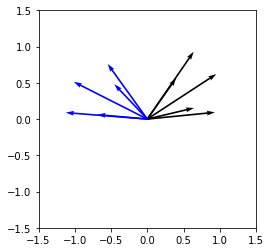

In [47]:
rotated_vectors = rot.dot(vectors)
plt.quiver(0, 0, vectors[0], vectors[1], scale=1, scale_units="xy", angles="xy")
plt.quiver(0, 0, rotated_vectors[0], rotated_vectors[1], scale=1, scale_units="xy", angles="xy", color="blue")
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.gca().set_aspect("equal")

Now let's analyse the matrix `rot`. You might recall that for a rotation matrix $R$ (a real orthognal matrix), $RR^T=R^TR=1$. Check this by comparing the trasnpose of `rot` to its inverse. You might find the function `inv` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)) in the numpy `linalg` module helpful.

array([[-0.5      ,  0.8660254],
       [-0.8660254, -0.5      ]])

Find the eigenvalues and eigenvectors of the matrix `rot` and compare with theoretic expectations. Can you plot these eigenvectors? Why or why not? You might find the `linalg` module functions `eig` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)) and `eigh` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)) useful for general and Hermitian matrices respectively.

(array([-0.5+0.8660254j, -0.5-0.8660254j]),
 array([[ 0.        -0.70710678j,  0.        +0.70710678j],
        [-0.70710678+0.j        , -0.70710678-0.j        ]]))

## Making 3D plots
Now suppose we have some function $f(x,y)$ and we'd like to plot it. The most common approaches are to either embed it into 3d space, $z=f(x,y)$ and plot the resulting surface in 3d, or to use colours to indicate the function value at various $(x,y)$ points, effectively creating an image. We shall walk you through one such example, not only to show you how to do this, but also to teach you about _broadcasting._

Broadcasting is the name given to numpy's automatic reshaping of arrays when required. To do computations, arrays must have exactly the same shape, i.e. the size must be the same in each axis. However, sometimes two arrays can have compatible shapes. This happens if one of the size along matching axes (starting from the innermost axes) is 1, in which case that size is scaled up by repeating the array along the axis (e.g. if array `a` has shape `(1,5,1,9)` and array `b` has shape `(10,1,3,9)`, `a+b` will return an array of shape `(10,5,3,9)`). It can also happen when one array has a subshape of another array (e.g. if array `a` has shape `(2,3,4,5)` and array `b` has shape `(4,5)`, `b` will be interpreted as having shape `(1,1,4,5)`). Consider the following examples:

In [70]:
a = np.arange(4).reshape((4,6))
print(a)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [71]:
b = np.arange(4).reshape((4,1))
print(b)

[[0]
 [1]
 [2]
 [3]]


In [77]:
print(a*b)

[[ 0  0  0  0  0  0]
 [ 6  7  8  9 10 11]
 [24 26 28 30 32 34]
 [54 57 60 63 66 69]]


In [78]:
print(a + np.arange(6))

[[ 0  2  4  6  8 10]
 [ 6  8 10 12 14 16]
 [12 14 16 18 20 22]
 [18 20 22 24 26 28]]


In [74]:
print(b + b.T)

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]]


Correctly used, broadcasting can make vectorisation simpler and easier. Consider the above problem of making the $N\times N$ matrix of vector dot-products, and let's pretend we didn't have the `dot` function. Try to reproduce the results by using broadcasting to create an array of shape `(2,N,N)` and summing over the axis corresponding to the components. The answer is below. (Note that this middle step involves creating an array twice the size of what we need; this is not a good idea for larger computations.)

In [ ]:
# try it yourself before seeing the next cell

In [100]:
big_array = vectors.reshape((2,N,1))*vectors.reshape(2,1,N)
m3 = np.sum(big_array, axis=0)
print(m3) #compare with m and/or m2

[[0.86613441 0.62038001 0.37666296 0.80700959 0.45951297]
 [0.62038001 1.042301   0.62280965 0.46782405 0.652085  ]
 [0.37666296 0.62280965 0.37222117 0.28588597 0.39049962]
 [0.80700959 0.46782405 0.28588597 0.77223301 0.36862204]
 [0.45951297 0.652085   0.39049962 0.36862204 0.41821496]]


Now let's return to our problem of 3d plotting. Suppose have arrays sampling $x$ and $y$, with sizes $N_x$ and $N_y$. We will need to convert this to two 2d arrays of size $N_y\times N_x$, with the $y$ values changing along the outer axis (columns) and $x$ values changing along the inner axis (rows). The numpy function `meshgrid` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)) does this:

In [108]:
N_x = 100
N_y = 200

x = np.linspace(0, 5, N_x)
y = np.linspace(-3, 1, N_y)

x_2d, y_2d = np.meshgrid(x,y)
x_2d.shape, y_2d.shape

((200, 100), (200, 100))

The following cells uses these arrays to plot $f(x,y)=\sin(3x)\cos(4y)$ as a 3d surface, and as an image.

In [127]:
def f(x,y):
    return np.sin(3*x)*np.cos(4*y)

z_2d = f(x_2d,y_2d)

Text(0.5, 0, '$f(x,y)$')

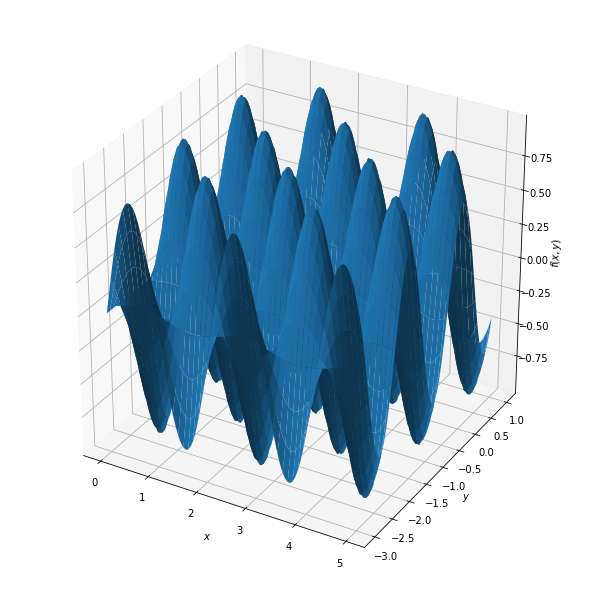

In [128]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8)) #create figure object to hold the plot
ax = Axes3D(fig) #create Axes3D object to display the plot
ax.plot_surface(x_2d, y_2d, z_2d)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$f(x,y)$")

Text(0, 0.5, '$y$')

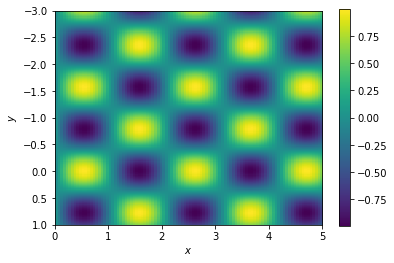

In [131]:
plt.imshow(z_2d, extent=(x[0],x[-1],y[-1],y[0]), cmap="viridis") #try changing the settings (e.g. pick a different cmap)
plt.colorbar()
plt.xlabel("$x$")
plt.ylabel("$y$")

Now the challenge to you is to compute `x_2d`, `y_2d`, and `z_2d` without using `meshgrid`, using only broadcasting. 

In [126]:
#find x_2d, y_2d, z_2d using only broadcasting

As additional practice, you can also use the numpy function `indices` ([docs](https://numpy.org/doc/stable/reference/generated/numpy.indices.html)), which, given the shape of a desired array, returns an array of indices increasing along each axis. Use this array to create `x_2d` and `y_2d` from `x` and `y`. (Hint: recall the various ways to index arrays.)

In [134]:
ind = np.indices((N_y,N_x))
ind.shape

(2, 200, 100)

In [135]:
print(ind[0])
print(ind[1])

[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [197 197 197 ... 197 197 197]
 [198 198 198 ... 198 198 198]
 [199 199 199 ... 199 199 199]]
[[ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 ...
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]
 [ 0  1  2 ... 97 98 99]]


In [ ]:
#find x_2d, y_2d, z_2d using indexing